In [1]:
import networkx as nx
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


In [28]:
path = "../graphs/graph_01.txt"
positions = []
edges = []
flag = None
with open(path, "r") as f:
    for line in f:
        line = line.strip()
        if line == "a" or line == "b":
            flag = line
            continue

        if flag == "a":
            positions.append(list(map(float, line.split())))
        else:
            edges.append(list(map(int, line.split())))

assert len(positions) == len(edges) + 1


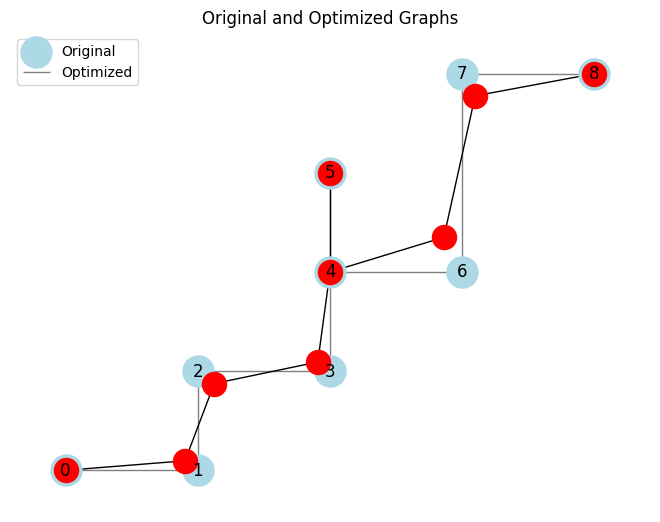

In [23]:
# Create the networkx graph
G = nx.Graph()

graph_dict = dict()
for idx, pos in enumerate(positions):
    graph_dict[idx] = pos

G.add_nodes_from(graph_dict.keys())
G.add_edges_from(edges)

for n, p in graph_dict.items():
    G.nodes[n]["pos"] = p

pos = nx.get_node_attributes(G, "pos")
num_nodes = len(pos)

# Create the optimization variables
opt_path = cp.Variable((num_nodes, 2))

# Define the regularization parameter
alpha = 5

# Define the objective function to minimize the curvature and distance
obj = cp.sum_squares(
    opt_path[1:-1, :] - 0.5 * (opt_path[0:-2, :] + opt_path[2:, :])
) + alpha * cp.sum_squares(opt_path - np.array(list(pos.values())))

# Define the constraints for fixed nodes
constraints = []
for node, position in pos.items():
    if len(list(G.neighbors(node))) != 2:
        constraints.append(opt_path[node, :] == np.array(position))

# Create the optimization problem
problem = cp.Problem(cp.Minimize(obj), constraints)

# Solve the problem
problem.solve()

# Retrieve the optimized path
optimized_pos = {node: tuple(opt_path[node, :].value) for node in G.nodes()}

# Draw the original and optimized graphs together
plt.figure()

# Draw the original graph
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=500,
    node_color="lightblue",
    edge_color="gray",
)

# Draw the optimized graph
nx.draw(
    G,
    pos=optimized_pos,
    with_labels=False,
    node_size=300,
    node_color="red",
    edge_color="black",
)

plt.title("Original and Optimized Graphs")
plt.legend(["Original", "Optimized"])
plt.show()
